In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])
# Compile the model
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9088 - loss: 0.2881 - val_accuracy: 0.9829 - val_loss: 0.0513
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9858 - loss: 0.0464 - val_accuracy: 0.9883 - val_loss: 0.0320
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9912 - loss: 0.0291 - val_accuracy: 0.9880 - val_loss: 0.0370
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9933 - loss: 0.0205 - val_accuracy: 0.9907 - val_loss: 0.0278
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9957 - loss: 0.0127 - val_accuracy: 0.9910 - val_loss: 0.0283
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9882 - loss: 0.0381
Test accuracy: 0.9910
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


In [2]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [3]:
!unzip "/content/FruitinAmazon.zip" -d "extracted_folder/"

Archive:  /content/FruitinAmazon.zip
  inflating: extracted_folder/FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: extracted_folder/FruitinAmazon/test/acai/images (2).jpeg  
  inflating: extracted_folder/FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: extracted_folder/FruitinAmazon/test/acai/images (16).jpeg  
  inflating: extracted_folder/FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: extracted_folder/FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: extracted_folder/FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: extracted_folder/FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: extracted_folder/FruitinAmazon/train/acai/images (3).jpeg  
  inflating: extracted_folder/FruitinAmazon/train/acai/images (4).jpeg  
  inflating: extracted_folder/FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: extracted_folder/FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: extracted_folder/FruitinAmazon/test/pupunh

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

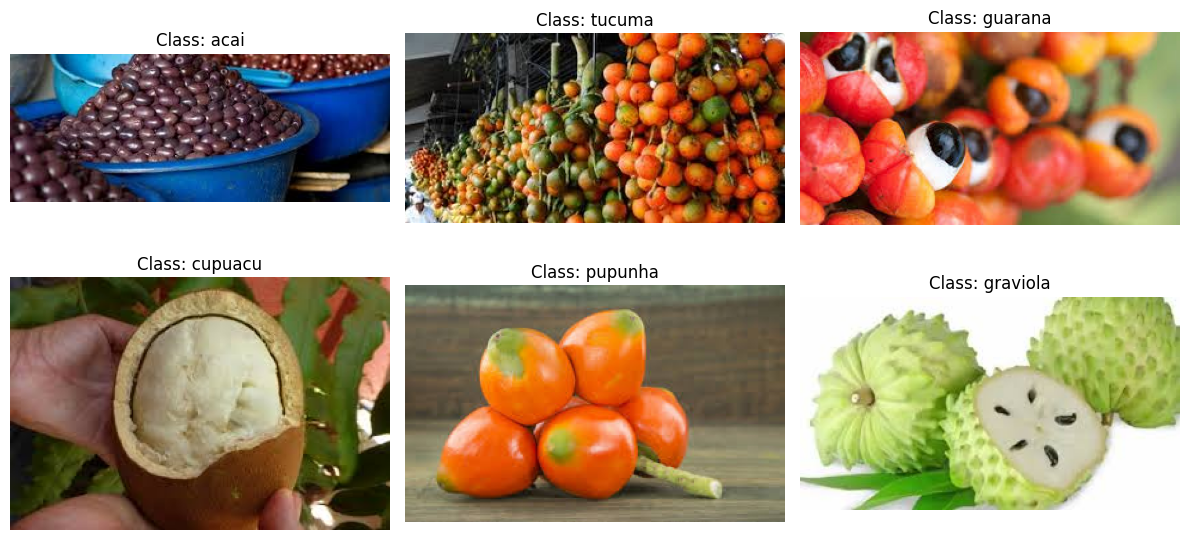

In [5]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Define the path to the train folder
train_dir = "/content/extracted_folder/FruitinAmazon/train"
test_dir = "/content/extracted_folder/FruitinAmazon/test"

# Step 1: Get the list of class directories
class_dirs = [f for f in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, f))]
num_classes = len(class_dirs)

# Step 2: Select one image randomly from each class
selected_images = []
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    # Get a list of image files in the class directory
    image_files = [f for f in os.listdir(class_path) if f.endswith(('jpg', 'jpeg', 'png'))]
    # Randomly select an image
    random_image = random.choice(image_files)
    selected_images.append(os.path.join(class_path, random_image))

# Step 3: Display the images in a 2-row grid using matplotlib
# Calculate the number of columns (based on the number of images)
num_images = len(selected_images)
num_cols = (num_images + 1) // 2  # Ensure there are two rows

fig, axes = plt.subplots(2, num_cols, figsize=(12, 6))
axes = axes.flatten()  # Flatten to easily iterate over axes

for i, img_path in enumerate(selected_images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes for better visualization
    axes[i].set_title(f"Class: {class_dirs[i]}")

# Turn off any unused axes if the number of images is less than the total grid slots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [6]:
# List to keep track of corrupted images
corrupted_images = []

# Step 1: Iterate through each class subdirectory
for class_dir in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_dir)

    # Only consider directories (skip non-directories)
    if os.path.isdir(class_path):
        # Step 2: Iterate through each image in the class subdirectory
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            # Check if the file is an image (by extension)
            if image_file.lower().endswith(('jpg', 'jpeg', 'png')):
                try:
                    # Step 3: Attempt to open the image to check its validity
                    with Image.open(image_path) as img:
                        img.verify()  # Verify the image (this doesn't load the image, only checks its validity)

                except (IOError, SyntaxError) as e:
                    # If there is an error, the image is corrupted, so remove it
                    os.remove(image_path)
                    corrupted_images.append(image_path)  # Add to the list of corrupted images
                    print(f"Removed corrupted image: {image_path}")

# Step 4: Print the result
if not corrupted_images:
    print("No corrupted images found.")


No corrupted images found.


In [7]:
import tensorflow as tf
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels="inferred",
  label_mode="int",
  image_size=(img_height, img_width),
  interpolation="nearest",
  batch_size=batch_size,
  shuffle=True,
  validation_split=validation_split,
  subset="training",
  seed=123
)
# Store class names before applying mapping
class_names = train_ds.class_names
num_classes = len(class_names)

print(f"Class names: {class_names}")
print(f"Number of classes: {num_classes}")
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset="validation",
seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,            # Path to the test dataset directory
    labels="inferred",   # Auto-assign labels based on subdirectory names
    label_mode="int",    # Labels as integer values
    image_size=(img_height, img_width),  # Resize images
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=False        # No shuffling for test set
)

test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']
Number of classes: 6
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Found 30 files belonging to 6 classes.


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(img_height, img_width, 3)),
    # Pooling Layer 1
    layers.MaxPooling2D((2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    # Pooling Layer 2
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Network
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),

    # Output Layer
    layers.Dense(num_classes)
])

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [10]:
# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
callbacks = [
  keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
  keras.callbacks.EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=20 ),
]
# Train the model with callbacks and validation split
history = model.fit(
  train_ds,
  batch_size=16,
  epochs=250,
  validation_data=val_ds,
  callbacks=callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1367 - loss: 1.9853 - val_accuracy: 0.0000e+00 - val_loss: 1.7996
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.2296 - loss: 1.6568 - val_accuracy: 0.5556 - val_loss: 1.3875
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.2964 - loss: 1.4631 - val_accuracy: 0.7222 - val_loss: 1.2217
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4462 - loss: 1.2888 - val_accuracy: 0.7222 - val_loss: 1.1568
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7127 - loss: 0.9862 - val_accuracy: 0.8889 - val_loss: 0.6540
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7383 - loss: 0.7968 - val_accuracy: 0.6667 - val_loss: 1.1124
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8346 - loss: 0.6157 - val_accuracy: 0.7222 - val_loss: 0.7254
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8750 - loss: 0.4773 - val_accuracy: 0.9444 - val_

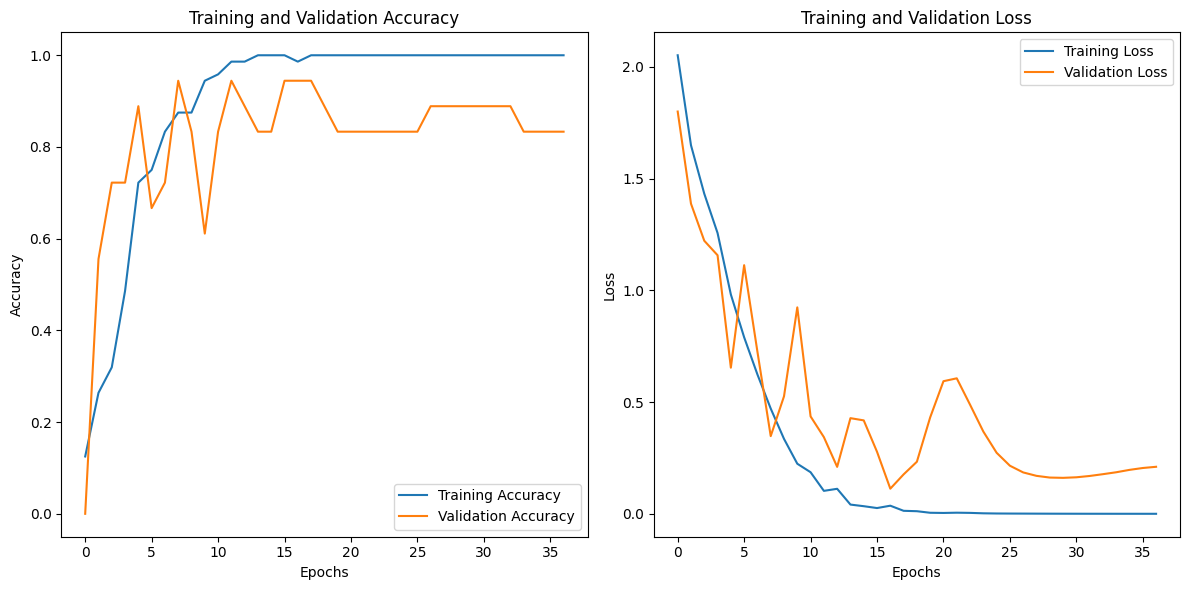

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
print("\nEvaluating model on validation set:")
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


Evaluating model on validation set:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9444 - loss: 0.1129
Test accuracy: 0.9444
Test loss: 0.1129


In [14]:
# Save the model
model.save('fruit_classification_model.h5')
print("Model saved to 'fruit_classification_model.h5'")

# Load the model
loaded_model = keras.models.load_model('fruit_classification_model.h5')
print("Model loaded successfully")

Model saved to 'fruit_classification_model.h5'
Model loaded successfully


In [15]:
import numpy as np

# Make predictions on the test dataset
predictions = model.predict(test_ds)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from test_ds
true_labels = np.concatenate([y.numpy() for _, y in test_ds])  # Convert dataset labels to NumPy array

# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {true_labels[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
Predicted label for first image: 0
True label for first image: 0


In [16]:
from sklearn.metrics import classification_report

# Print the classification report
print("Classification Report:\n")
print(classification_report(true_labels, predicted_labels, target_names=class_names))

Classification Report:

              precision    recall  f1-score   support

        acai       0.67      0.80      0.73         5
     cupuacu       0.80      0.80      0.80         5
    graviola       0.83      1.00      0.91         5
     guarana       0.67      0.80      0.73         5
     pupunha       1.00      0.60      0.75         5
      tucuma       0.75      0.60      0.67         5

    accuracy                           0.77        30
   macro avg       0.79      0.77      0.76        30
weighted avg       0.79      0.77      0.76        30

